In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
# import factor analyzer library
from factor_analyzer import FactorAnalyzer



ModuleNotFoundError: No module named 'factor_analyzer'

In [28]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
#open raw data donwloaded from World Bank
data = pd.read_csv('/Users/vijaygovardhanpasula/Downloads/raw data selected.csv')
data = data.sort_values(by=['Series Name', 'Country Name'])
data = data.set_index('Series Name')

In [4]:
indicators = sorted(set(data.index))
economies = sorted(set(data['Country Name']))
num_econ = len(economies)
columns = list(data.columns)
columns = columns[1:]
years = columns[2:]
yearlist = []

data = data[columns]

In [5]:
#set up a dataframe
df = pd.DataFrame(index = indicators, columns = economies)
datalog = pd.DataFrame(index = indicators)

In [6]:
#construct an usable dataframe
for indicator in indicators:
    
    year = 0
    
    #filtering out the indicators that too few countries provide
    for i in range(len(years)):
        if list(data.loc[indicator][years[i]] != '..').count(False) <= 35:
            if (year != 0) and (year != 1):
                if list(data.loc[indicator][years[i]] != '..').count(False) <= list(data.loc[indicator][years[year]] != '..').count(False):
                    year = i
            else:
                year = i
    
    #print the indicators and their latest years
    print(indicator, '-', years[year])
    yearlist.append(years[year])
    
    for economy in economies:
        try:
            #print(data.loc[data['Country Name'] == economy].loc[indicator].loc[years[year]])
            df.at[indicator, economy] = data.loc[data['Country Name'] == economy].loc[indicator].loc[years[year]]
        except:
            df.at[indicator, economy] = np.nan

Access to electricity, rural (% of rural population) - 2015 [YR2015]
Access to electricity, urban (% of urban population) - 2018 [YR2018]
Agriculture, forestry, and fishing, value added (% of GDP) - 2013 [YR2013]
Birth rate, crude (per 1,000 people) - 2014 [YR2014]
CO2 emissions (metric tons per capita) - 2014 [YR2014]
Current health expenditure (% of GDP) - 2011 [YR2011]
Death rate, crude (per 1,000 people) - 2014 [YR2014]
Diabetes prevalence (% of population ages 20 to 79) - 2019 [YR2019]
Employment in agriculture (% of total employment) (modeled ILO estimate) - 2019 [YR2019]
Employment in industry (% of total employment) (modeled ILO estimate) - 2019 [YR2019]
Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate) - 2019 [YR2019]
GDP growth (annual %) - 2014 [YR2014]
GDP per capita growth (annual %) - 2014 [YR2014]
Immunization, DPT (% of children ages 12-23 months) - 2018 [YR2018]
Individuals using the Internet (% of population) - 2017 [YR2017]
Industry (includ

In [7]:
#print the indicators and their years
datalog['Year'] = yearlist
#print(yearlist.count(years[0]))

datalog_selected = datalog[datalog['Year'] != years[0]] 
indicators_selected = list(datalog_selected.index)

df_selected = df.loc[indicators_selected]

indicators_count = []

for economy in economies:
    indicators_count.append(list(df_selected[economy] == '..').count(False))
    print(economy, '-', list(df_selected[economy] == '..').count(False))

print(indicators_count.count(datalog_selected.size))

count = dict(zip(economies, indicators_count))


Afghanistan - 29
Albania - 28
Algeria - 29
American Samoa - 9
Andorra - 16
Angola - 29
Antigua and Barbuda - 23
Argentina - 29
Armenia - 29
Aruba - 15
Australia - 29
Austria - 29
Azerbaijan - 29
Bahamas, The - 29
Bahrain - 29
Bangladesh - 29
Barbados - 25
Belarus - 29
Belgium - 29
Belize - 29
Benin - 29
Bermuda - 14
Bhutan - 29
Bolivia - 29
Bosnia and Herzegovina - 29
Botswana - 29
Brazil - 29
British Virgin Islands - 9
Brunei Darussalam - 29
Bulgaria - 28
Burkina Faso - 28
Burundi - 29
Cabo Verde - 29
Cambodia - 29
Cameroon - 29
Canada - 29
Cayman Islands - 18
Central African Republic - 28
Chad - 28
Channel Islands - 11
Chile - 29
China - 29
Colombia - 29
Comoros - 28
Congo, Dem. Rep. - 28
Congo, Rep. - 29
Costa Rica - 29
Cote d'Ivoire - 29
Croatia - 29
Cuba - 28
Curacao - 19
Cyprus - 29
Czech Republic - 29
Denmark - 29
Djibouti - 29
Dominica - 22
Dominican Republic - 29
Ecuador - 29
Egypt, Arab Rep. - 29
El Salvador - 29
Equatorial Guinea - 28
Eritrea - 19
Estonia - 29
Eswatini - 29


In [8]:
#show selected economies
economies_selected = {key: count[key] for key in count if (count[key] == datalog_selected.size)}
#show dropped economies
economies_dropped = {key: count[key] for key in count if (count[key] < datalog_selected.size) and (count[key] >= datalog_selected.size-2)}

df_final= df_selected[economies_selected.keys()]
df_final = df_final.astype(float)

df_dropped = df_selected[economies_dropped.keys()]


In [9]:
# import factor analyzer library
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.fit(df_final.T, 25)

ev, v = fa.get_eigenvalues()

# Create scree plot using matplotlib
plt.figure(figsize=(6,4))
plt.scatter(range(1,df_final.T.shape[1]+1),ev)
plt.plot(range(1,df_final.T.shape[1]+1),ev)
plt.hlines(1, 0, df_final.T.shape[1], colors='r')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

ModuleNotFoundError: No module named 'factor_analyzer'

NameError: name 'FactorAnalyzer' is not defined

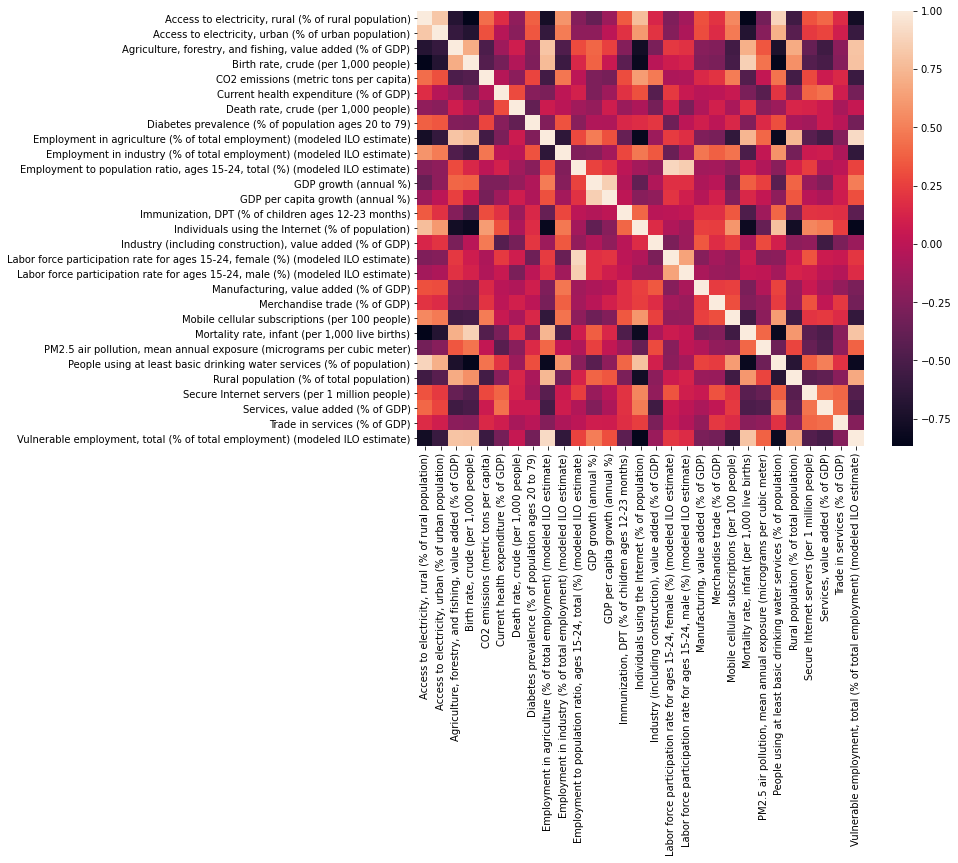

In [21]:
#Plot correlation matrix of indicators
plt.figure(figsize=(10,8))
corrMatrix = df_final.T.corr()
sns.heatmap(corrMatrix)

fa = FactorAnalyzer()
fa.fit(df_final.T, 25)

ev, v = fa.get_eigenvalues()

In [ ]:
# Create scree plot using matplotlib
plt.figure(figsize=(6,4))
plt.scatter(range(1,df_final.T.shape[1]+1),ev)
plt.plot(range(1,df_final.T.shape[1]+1),ev)
plt.hlines(1, 0, df_final.T.shape[1], colors='r')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [22]:
#Perform Factor Analysis
fa = FactorAnalyzer(list(ev >= 0.95).count(True), rotation='varimax')
fa.fit(df_final.T)
loads = fa.loadings_
print(loads)
loads = pd.DataFrame(loads, index=df_final.index)



NameError: name 'FactorAnalyzer' is not defined

In [23]:
#Heatmap of loadings
plt.figure(figsize=(15,15))
sns.heatmap(loads, annot=True, cmap="YlGnBu")

NameError: name 'loads' is not defined

<Figure size 1080x1080 with 0 Axes>

In [24]:
# Get variance of each factors
fa_var = fa.get_factor_variance()
fa_var = pd.DataFrame(fa_var, index=['SS loadings', 'Proportion Var', 'Cumulative Var'])
print(fa_var)

NameError: name 'fa' is not defined

In [25]:
## cluster analysis

In [26]:
#standardization along columns
df_final_std=(df_final.T-df_final.T.mean())/df_final.T.std()

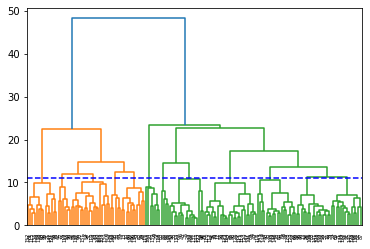

In [29]:
#Create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_final_std, method='ward'))
plt.axhline(y=11, color='b', linestyle='--')

In [13]:
# create clusters
hc = AgglomerativeClustering(n_clusters=12, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(df_final_std)

NameError: name 'AgglomerativeClustering' is not defined

In [14]:
df_final_T = df_final.T
df_final_T['cluster'] = y_hc
df_final_T.sort_values("cluster", inplace = True, ascending=True)

NameError: name 'y_hc' is not defined

In [15]:
df_final_std['cluster'] = y_hc
df_final_std.sort_values("cluster", inplace = True, ascending=True)

NameError: name 'y_hc' is not defined

In [16]:
df_cluster = df_final_T.groupby('cluster').mean()
df_cluster_std = df_final_std.groupby('cluster').mean()

KeyError: 'cluster'

In [17]:
#Heatmap of cluster characteristics
plt.figure(figsize=(10,20))
sns.heatmap(df_cluster_std.T, cmap="Blues", linewidths=.5)

NameError: name 'df_cluster_std' is not defined

<Figure size 720x1440 with 0 Axes>

In [18]:
#Heatmap of cluster characteristics based on factor analysis
f0 = [indicators[i] for i in (0, 1, 14, 20, 23)]
f1 = [indicators[i] for i in (10, 16, 17)]
f2 = [indicators[i] for i in (11, 12)]
f3 = [indicators[i] for i in (4, 15)]
f4 = [indicators[i] for i in (7, 22)]
f5 = [indicators[i] for i in (9, 18, 19)]
f6 = [indicators[i] for i in (25, 26, 27)]

indicators_factor = f0 + f1 + f2 + f3 + f4 + f5 + f6
df_cluster_std_selected = df_cluster_std.T.loc[indicators_factor]

NameError: name 'df_cluster_std' is not defined

In [19]:
#Heatmap of cluster characteristics
plt.figure(figsize=(10,20))
sns.heatmap(df_cluster_std_selected, annot=True, cmap="Blues", linewidths=.5)

NameError: name 'df_cluster_std_selected' is not defined

<Figure size 720x1440 with 0 Axes>

In [20]:
#count the number of countries in cluster
num_of_countries = []
for n in range(len(set(y_hc))):
    num_of_countries.append(sum(df_final_T['cluster'] == n))
    
df_cluster['num of countries'] = num_of_countries
df_cluster_std['num of countries'] = num_of_countries

columns = list(df_cluster.columns)
columns = columns[-1:] + columns[:-1]

df_cluster = df_cluster.reindex(columns=columns)
df_cluster_std = df_cluster_std.reindex(columns=columns)

NameError: name 'y_hc' is not defined